In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/fifa_eda.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
# lets check the percentage null values in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

Text(0, 0.5, 'Release Clause')

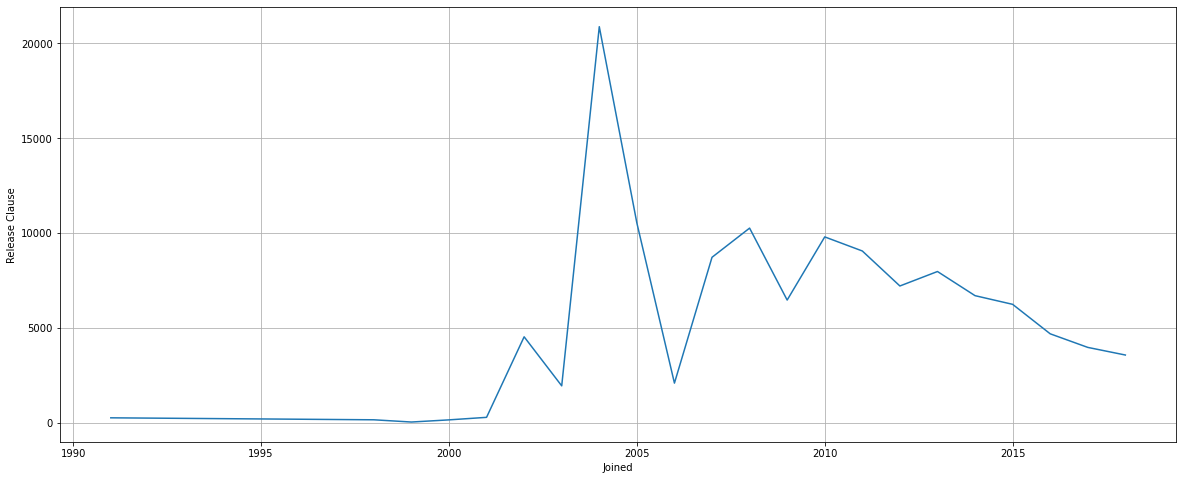

In [17]:
# lets check if newely joined player have a higher release clause or old player have a high release clause 
tmp_df=df.groupby(['Joined'])['Release Clause'].mean().reset_index()
plt.figure(figsize=(20,8))
plt.plot(tmp_df['Joined'],tmp_df['Release Clause'])
plt.grid()
plt.xlabel('Joined')
plt.ylabel('Release Clause')  # Player who have join in 2004 have high release clause

In [21]:
# Top 10 players with highest wage 
df.sort_values(by='Wage',ascending=False)[['Name','Wage']].head(10)

,Name,Wage
0,L. Messi,565.0
7,L. Suárez,455.0
6,L. Modrić,420.0
1,Cristiano Ronaldo,405.0
8,Sergio Ramos,380.0
11,T. Kroos,355.0
36,G. Bale,355.0
4,K. De Bruyne,355.0
5,E. Hazard,340.0
32,Coutinho,340.0


In [101]:
# % of left foot players 
print(df['Preferred Foot'].unique())
len(df[df['Preferred Foot']=='Left'])*100/len(df)

['Left' 'Right']


23.128467073103753

Text(0, 0.5, 'Skill Moves')

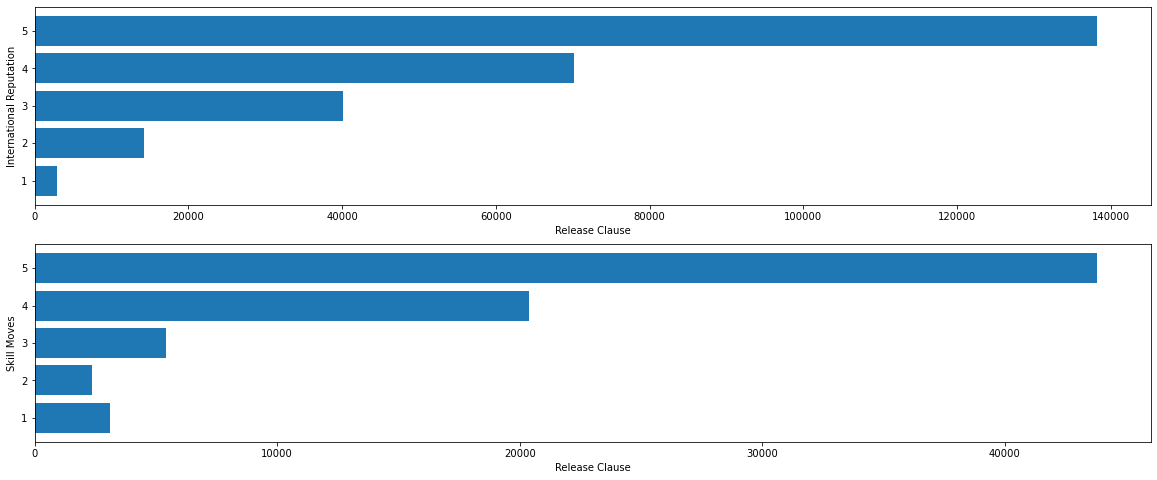

In [29]:
# lets now check international reputation , skill moves vs Release clause 
tmp_df1=df.groupby(['International Reputation'])['Release Clause'].mean().reset_index()
tmp_df2=df.groupby(['Skill Moves'])['Release Clause'].mean().reset_index()
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.barh(y=tmp_df1['International Reputation'],width=tmp_df1['Release Clause'])
plt.xlabel('Release Clause')
plt.ylabel('International Reputation')
plt.subplot(2,1,2)
plt.barh(y=tmp_df2['Skill Moves'],width=tmp_df2['Release Clause'])
plt.xlabel('Release Clause')
plt.ylabel('Skill Moves')

In [45]:
# idetinfy all the contineous features and draw a histogram for the same.
# hint if no of unique values are more then 20 consider that feature as contineous
cont_col=[x for x in df.columns if len(df[x].unique())>20 and df[x].dtype!='O']
cont_col.remove('ID')

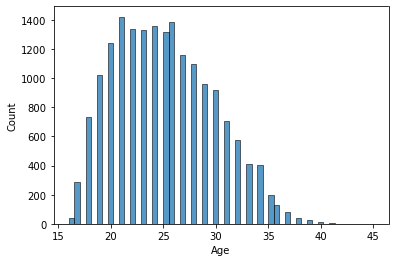

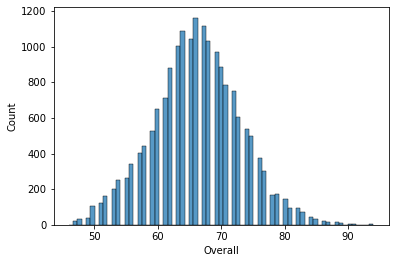

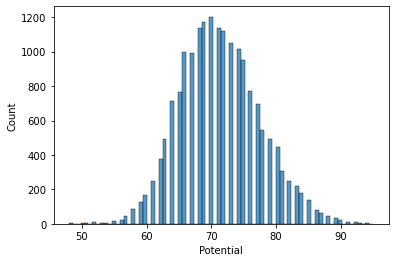

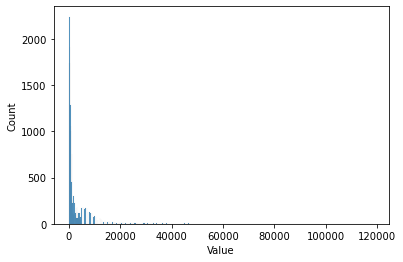

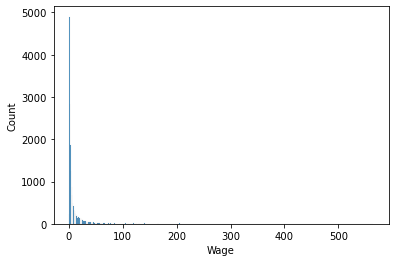

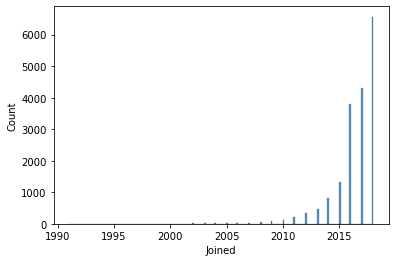

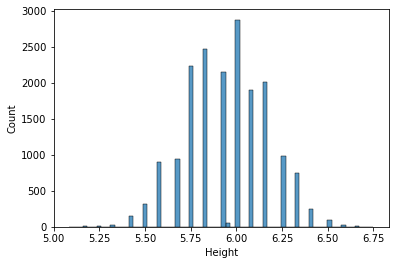

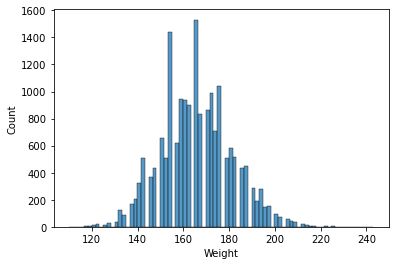

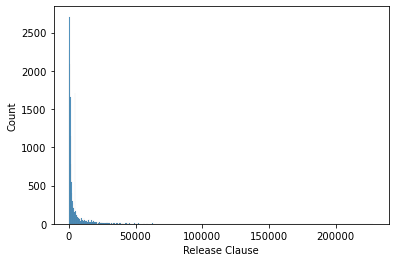

In [51]:
for col in cont_col:
    sns.histplot(df[col])
    plt.show()

In [53]:
# oldest player in the dataset
df.sort_values(by=['Age'],ascending=False)[['Age','Name']]

,Age,Name
4741,45,O. Pérez
18183,44,K. Pilkington
17726,44,T. Warner
10545,42,S. Narazaki
7225,41,C. Muñoz
...,...,...
17921,16,J. Rowland
17887,16,M. Tilio
15363,16,Y. Roemer
17881,16,R. Hauge


In [54]:
# Total distinct clubs in the data 
len(df['Club'].unique())

652

In [63]:
# Country wise age distribution of players , only for top 10 countries with highest players 
# first we will find out top 10 countries with highest number of player , since 1 row represents 1 player 
top_10_countries=df.groupby(['Nationality']).size().reset_index()
top_10_countries.columns=['Country','Player_Count']
top_10_countries.sort_values(by='Player_Count',inplace=True,ascending=False)
top_10_countries=top_10_countries.head(10)
top_10_countries

,Country,Player_Count
46,England,1662
59,Germany,1198
139,Spain,1072
6,Argentina,937
55,France,914
20,Brazil,827
78,Italy,702
31,Colombia,618
81,Japan,478
108,Netherlands,453


In [67]:
tmp_df=df[df['Nationality'].isin(top_10_countries['Country'])]

<AxesSubplot:xlabel='Nationality', ylabel='Age'>

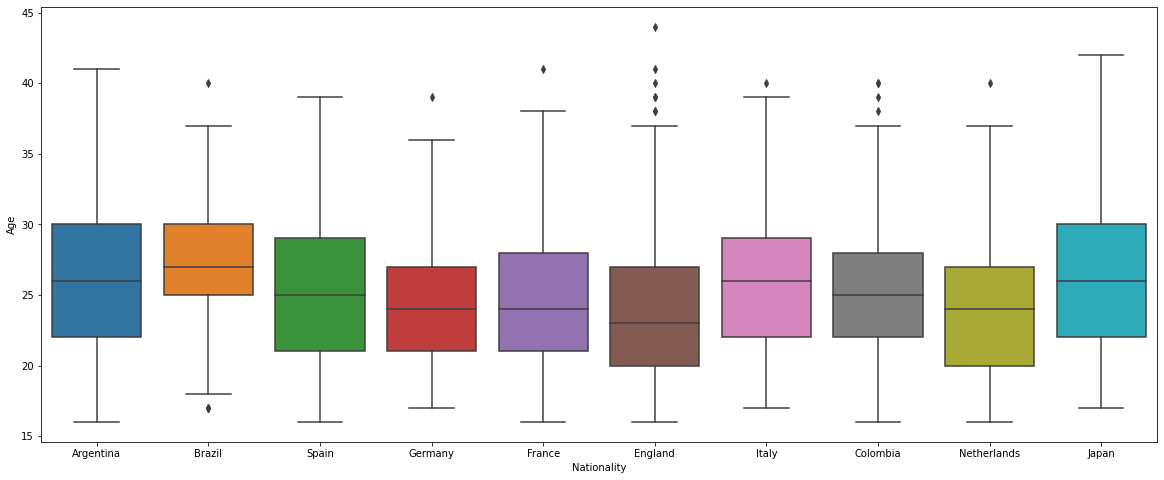

In [68]:
plt.figure(figsize=(20,8))
sns.boxplot(x=tmp_df['Nationality'],y=tmp_df['Age'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no of players', ylabel='rating'>

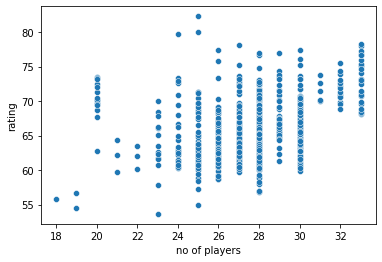

In [72]:
# is there any correlation between number of player in a club with the average rating of all the player in the club
player_club_rating=df.groupby(['Club']).agg({'ID':'size','Overall':'mean'}).reset_index()
player_club_rating.columns=['Club','no of players','rating']
sns.scatterplot(player_club_rating['no of players'],player_club_rating['rating'])

In [81]:
# does height of the player really effect their rating 
print(df['Height']) # we can see that the height of the player is in decimal upto 6 plays 
# in order to create some buckets of height lets convert this to centimeter and take the int values

0        5.583333
1        6.166667
2        5.750000
3        6.333333
4        5.916667
           ...   
18202    5.750000
18203    6.250000
18204    5.666667
18205    5.833333
18206    5.833333
Name: Height, Length: 18207, dtype: float64

In [82]:
# converting height to cm
df['Height_in_cm']=df['Height']*30.48
df['Height_in_cm']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height_in_cm, Length: 18207, dtype: float64

In [85]:
# rounding height 
df['Height_in_cm']=round(df['Height_in_cm']).astype(int)
df['Height_in_cm']

0        170
1        188
2        175
3        193
4        180
        ... 
18202    175
18203    190
18204    173
18205    178
18206    178
Name: Height_in_cm, Length: 18207, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_in_cm', ylabel='Overall'>

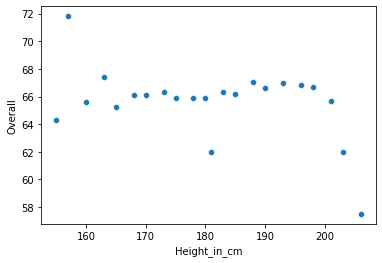

In [92]:
# now we will have atleast few repeated values for each height 
tmp_df=df.groupby(['Height_in_cm'])['Overall'].mean().reset_index()
sns.scatterplot(tmp_df['Height_in_cm'],tmp_df['Overall']) # height does not seem to have much impact of mean rating

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Overall'>

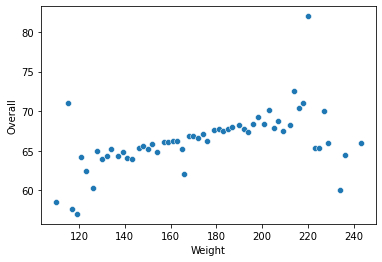

In [96]:
# weight vs rating 
tmp_df=df.groupby(['Weight'])['Overall'].mean().reset_index()
sns.scatterplot(tmp_df['Weight'],tmp_df['Overall']) # it has a direct relation with the ratings of player

In [97]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Height_in_cm
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,170
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,188
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,175
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,193
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0,175
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0,190
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0,173
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0,178
